# Assignment 9

## Submit your .ipynb file to Gradescope by Thursday, November 20th **by 10pm**

##### Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "4">

1. Specifying format in ``pd.to_datetime()``

<font size = "3">

Read in the file "daily_prices_msft.csv" using Pandas, and save it to a DataFrame. This dataset contains Microsoft stock prices from December 1997 to May 2012.

The person who collected the data entered the date in a non-standard way: each row in the "date_str" column contains the string "Date (MM/DD/YYYY): [date]" (where [date] is a placeholder for the actual date for that row.)

Use the "format" argument in ``pd.to_datetime`` to convert it to Datetime format, creating a new column of the DataFrame called "date".

In [2]:
# your code here

df = pd.read_csv("data/daily_prices_msft.csv")

ft_string = "Date (MM/DD/YYYY): %m/%d/%Y"
df["date"] = pd.to_datetime(df["date_str"], format = ft_string)


<font size = "4">

2. Plot log return

<font size = "3">

If you haven't done so already, add a column "date" to the DataFrame that has the Datetime format (if you can't figure out Question 1 yet, I have added a column called "date_std_format" that you can convert with ``pd.to_datetime()`` without using the "format" argument.)

Add a new column to the DataFrame with the name "log_return" based on the formula for the daily log return:

$$\ln\left(\frac{\textrm{current day's adjusted price}}{\textrm{previous day's adjusted price}}\right)$$

where

- $\ln$ is the natural logarithm (log base $\textrm{e}$)
- The adjusted price for each day can be found in the column "adjusted"

To create this column, you must use the ``.shift`` method and Numpy's built-in function for the natural logarithm. Since this is the *natural* logarithm, the function is (naturally) called ``np.log``

Then create a line plot of "date vs. daily log return" with labeled axes and a title.


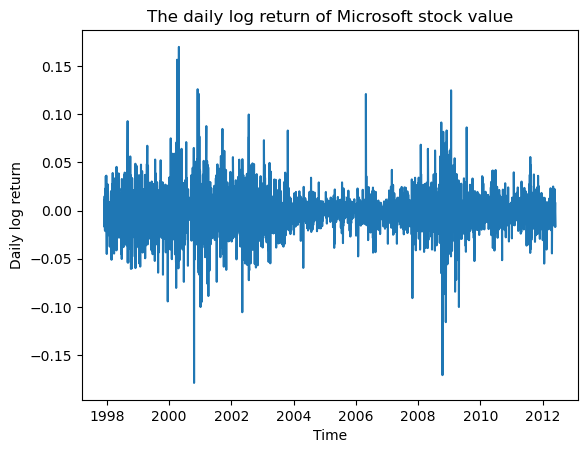

In [3]:
# your code here

# df["date"] = pd.to_datetime(df["date_std_format"])

df["log_return"] = np.log(df["adjusted"].shift(1)/df["adjusted"])

plt.plot("date", "log_return",
         data = df)
plt.xlabel("Time")
plt.ylabel("Daily log return")
plt.title("The daily log return of Microsoft stock value")
plt.show()

<font size = "4">

3. Highlight a time period

<font size = "3">

The "Great Recession" was a world-wide period of market decline lasting from December 2007 to June 2009. Create a line plot of "Time vs. Adjusted Price" (not the log return you created above).

Using ``plt.fill_between()`` highlight the region corresponding to dates beginning on December 1st, 2007 and ending June 30, 2009. The highlighted region should be a **rectangle** where two of the sides should correspond to the beginning and end of the Great Recession, and the "bottom" and "top" of the rectangle should correspond to the values 11 and 27, respectively.

(**Note:** I chose the values 11 and 27 by "eye-balling" the graph, but this is a rather inefficient way of doing this. You don't have to worry about it for this assignment, but ideally, you would want to choose the minimum and maximum values of the adjusted price for this time period, calculated using Python commands )

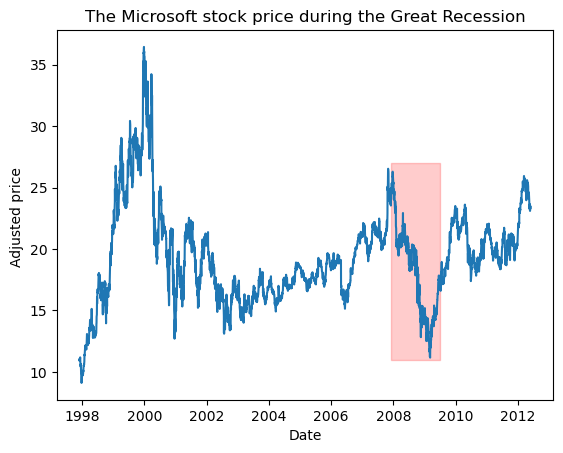

In [5]:
# your code here
plt.plot("date", "adjusted", data = df)
plt.xlabel("Date")
plt.ylabel("Adjusted price ")
plt.title("The Microsoft stock price during the Great Recession")

x_vals = df["date"]
y_vals = df["adjusted"]
condition = df["date"].between("2007-12-01","2009-06-30")

plt.fill_between(x = x_vals,
                 y1 = 11,
                 y2 = 27,
                 where = condition,
                 alpha = 0.2,color = "red")
plt.show()


<font size = "4">

4. Percentage growth rate

<font size = "3">

If you haven't done so already, add a column "date" to the DataFrame that has the Datetime format (if you can't figure out Question 1 yet, I have added a column called "date_std_format" that you can convert with ``pd.to_datetime()`` without using the "format" argument.)

For this question, we want to calculate and plot the percentage growth for Microsoft's adjusted stock price.

Up to now, we have been ignoring the fact that financial data is only available on weekdays. Previously, when we computed the percentage growth for a Monday, we treated the previous Friday as "yesterday".

To fix this, we can calculate the percentage growth **rate** using the formula:

$$\textrm{per. growth rate} = \frac{(\textrm{today's price}) - (\textrm{previous day's price})}{\textrm{(previous day's price)}\times (\#\  \textrm{of days})} \times 100\  \%$$

The number of days that have passed between rows in the dataset can be calculated using the "date" column as follows:

```python
    df["date"].diff().dt.days
```

Add a new column to the DataFrame called "growth_adjusted" that contains the percentage growth rate of the adjusted stock price (found in the "adjusted" column). Then make a plot of "time vs. percentage growth rate" with labeled axes and a title.

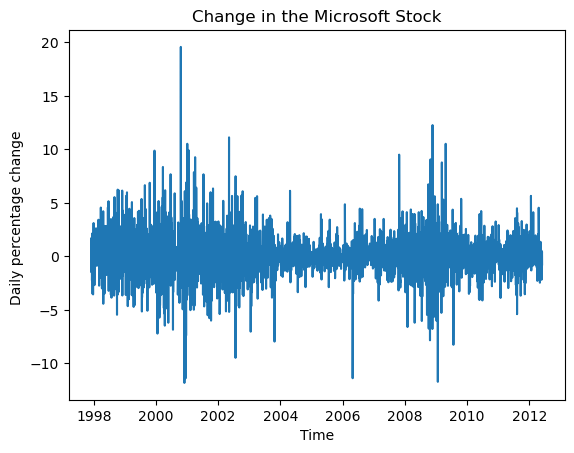

In [6]:
# your code here

numerator = df["adjusted"].diff()
denominator = df["adjusted"].shift(1) * df["date"].diff().dt.days

df["growth_adjusted"] = (numerator / denominator) * 100
plt.plot("date", "growth_adjusted", data = df)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the Microsoft Stock")
plt.show()

<font size = "4">

5. Fix an incorrect plot

<font size = "3">

In **Assignment 7** (questions 4 and 5) you used the ``statsmodels.formula.api`` to construct a linear model approximating the relationship between a car's weight and its mpg (miles per gallon).

In the code cell below, I use ``numpy`` to construct a **quadratic** model between these two variables:

$$ m_i \approx a\cdot w_i^2 + b\cdot w_i + c$$

where $m_i$ is the mpg of car $i$, $w_i$ is the weight of car $i$, and $a$, $b$, $c$ are the coefficients of the model. **Everything I do in the first cell is correct.**

In the second cell, I plot both the true data and a line plot of the quadratic model - which should look like a parabola. However, something is clearly off. 

- Change **the first line** of the second code cell so that the Best Quadratic Fit is plotted correctly. Simply change the first line, **do not add any additional lines of code**

- In a comment (or markdown cell), explain why changing this single line fixes the Best Quadratic Fit curve, but does **not** cause the scatter plot to be incorrect.

In [8]:
# Everything in this cell is correct - do not change!
df_cars = pd.read_csv("data/features.csv")

independent_var = df_cars["weight"]
dependent_var = df_cars["mpg"]
model_degree = 2

a, b, c = np.polyfit(x = independent_var, y = dependent_var, 
    deg = model_degree)

In [ ]:
# RUN THE CELL ABOVE FIRST

######
df_plot = df_cars.sort_values(by = "weight")
######

#### Written answer:
# Line plots are created by plotting all of the (x,y) pairs
# from the dataset and connecting them with straight lines.
# The points are plotted in the order in which they appear
# in the dataset, and lines are drawn between consecutive points.
# In order for the lines to be drawn from left to right (or right
# to left), the DataFrame must be sorted by the variable on the 
# x-axis. For a scatter plot, no lines are drawn between points,
# so it does not matter how the DataFrame is ordered.



# Do not change any code below here. (Adding a comment below here is fine)
x_data = df_plot["weight"]

y_scatter = df_plot["mpg"]
y_line = a * df_plot["weight"]**2 + b * df_plot["weight"] + c

plt.figure(figsize=(5,4))
plt.scatter(x_data, y_scatter, label = "Data")
plt.plot(x_data, y_line, color = "red", label = "Best Quadratic Fit")
plt.legend()
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Quadratic model of Car Weight vs. MPG")
plt.show()